<a href="https://colab.research.google.com/github/ranjan-stha/machine_learning/blob/master/MNISTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
transforms = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.5,), (0.5,),)])

In [3]:
train_ds = datasets.MNIST('./MNIST', train=True, transform=transforms, download=True)
test_ds = datasets.MNIST('./MNIST', train=False, transform=transforms, download=True)

Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/MNIST/raw


Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw


Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/MNIST/raw


Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
# Data loaders
train_dl = torch.utils.data.DataLoader(train_ds, shuffle=True, batch_size=64)
test_dl = torch.utils.data.DataLoader(test_ds, shuffle=True, batch_size=64)



torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([28, 28])
Label is 6


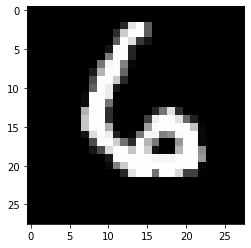

In [5]:
# Display an image
img, lbl = next(iter(train_dl))
print (img.shape)
print (lbl.shape)
print (img[0].squeeze().shape)
plt.imshow(img[0].squeeze(), cmap='gray')
print ('Label is {}'.format(lbl[0]))

In [0]:
class Classifier(nn.Module):
  def __init__(self,):
    super(Classifier, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=64, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )
    self.fc = nn.Linear(7*7*128, 10)
  
  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.fc(out.view(out.shape[0], -1))
    return out

In [0]:
model = Classifier()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [10]:
epoch_nums = 5
losses = []

for epoch in range(epoch_nums):
  for i, (images, labels) in enumerate(train_dl):
    output = model(images)

    loss = criterion(output, labels)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
  
  losses.append(loss.item())

    

KeyboardInterrupt: ignored

In [0]:
plt.plot([i for i in range(epoch_nums)], losses)

In [9]:
model.eval()

with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_dl:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  
  print ('Test Accuracy {}'.format(100 * correct/total))

Test Accuracy 98.79
